# Modelo de machine learning câncer de mama

**UCI Machine Learning Repository**

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wis

**Informações sobre o atributo:**

1) ID número

2) Diagnóstico (M = maligno, B = benigno)

3-32)

**Dez recursos de valor real são calculados para cada núcleo celular:**

a) raio (média das distâncias do centro aos pontos no perímetro)

b) textura (desvio padrão dos valores da escala de cinza)

c) perímetro

d) área

e) suavidade (variação local nos comprimentos dos raios)

f) compacidade (perímetro ^ 2 / área - 1,0)

g) concavidade (severidade das porções côncavas do contorno)

h) pontos côncavos (número de porções côncavas do contorno)

i) simetria

j) dimensão fractal ("aproximação do litoral" - 1)

A média, o erro padrão e o "pior" ou maior (média dos três
maiores valores) desses recursos foram calculados para cada imagem,
resultando em 30 recursos. Por exemplo, o campo 3 é o raio médio, o campo
13 é o raio SE, o campo 23 é o pior raio.

Todos os valores de recursos são recodificados com quatro dígitos significativos.

Valores de atributo ausentes: nenhum

Distribuição de classes: 357 benignos, 212 malignos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

C:\Users\RafaelHenriqueGallo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dados = pd.read_csv("data.csv")
dados

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
dados.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
dados.shape

(569, 33)

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
dados.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)
dados['diagnosis'] = dados['diagnosis'].map({'M':1, 'B':0})

dados = dados.drop(['perimeter_mean', 
                            'area_mean', 
                            'radius_worst', 
                            'perimeter_worst', 
                            'area_worst',
                            'perimeter_se', 
                            'area_se', 
                            'texture_worst',
                            'concave points_worst', 
                            'concavity_mean', 
                            'compactness_worst'], 
                            axis=1)

dados.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,0.11840,0.27760,0.14710,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,1,20.57,17.77,0.08474,0.07864,0.07017,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,1,19.69,21.25,0.10960,0.15990,0.12790,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,1,11.42,20.38,0.14250,0.28390,0.10520,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,1,20.29,14.34,0.10030,0.13280,0.10430,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


In [7]:
dados.columns = ["diagnóstico", 
                 "raio", 
                 "textura", 
                 "suavidade", 
                 "compactação", 
                 "pontos côncavos", 
                 "simetria", 
                 "dimensão fractal", 
                 "raio se, textura", 
                 "textura se suavidade se", 
                 "compactação se", 
                 "concavidade se", 
                 "côncavo", 
                 "se pontos", 
                 "simetria se", 
                 "dimensão fractal", 
                 "suavidade pior", 
                 "concavidade pior", 
                 "simetria pior", 
                 "pior dimensão"]

dados.head()

,diagnóstico,raio,textura,suavidade,compactação,pontos côncavos,simetria,dimensão fractal,"raio se, textura",textura se suavidade se,compactação se,concavidade se,côncavo,se pontos,simetria se,dimensão fractal,suavidade pior,concavidade pior,simetria pior,pior dimensão
0,1,17.99,10.38,0.11840,0.27760,0.14710,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,1,20.57,17.77,0.08474,0.07864,0.07017,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,1,19.69,21.25,0.10960,0.15990,0.12790,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,1,11.42,20.38,0.14250,0.28390,0.10520,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,1,20.29,14.34,0.10030,0.13280,0.10430,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


In [8]:
dados.describe()

,diagnóstico,raio,textura,suavidade,compactação,pontos côncavos,simetria,dimensão fractal,"raio se, textura",textura se suavidade se,compactação se,concavidade se,côncavo,se pontos,simetria se,dimensão fractal,suavidade pior,concavidade pior,simetria pior,pior dimensão
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,0.096360,0.104341,0.048919,0.181162,0.062798,0.405172,1.216853,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,0.132369,0.272188,0.290076,0.083946
std,0.483918,3.524049,4.301036,0.014064,0.052813,0.038803,0.027414,0.007060,0.277313,0.551648,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,0.022832,0.208624,0.061867,0.018061
min,0.000000,6.981000,9.710000,0.052630,0.019380,0.000000,0.106000,0.049960,0.111500,0.360200,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,0.071170,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,0.086370,0.064920,0.020310,0.161900,0.057700,0.232400,0.833900,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,0.116600,0.114500,0.250400,0.071460
50%,0.000000,13.370000,18.840000,0.095870,0.092630,0.033500,0.179200,0.061540,0.324200,1.108000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,0.131300,0.226700,0.282200,0.080040
75%,1.000000,15.780000,21.800000,0.105300,0.130400,0.074000,0.195700,0.066120,0.478900,1.474000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,0.146000,0.382900,0.317900,0.092080
max,1.000000,28.110000,39.280000,0.163400,0.345400,0.201200,0.304000,0.097440,2.873000,4.885000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,0.222600,1.252000,0.663800,0.207500


In [9]:
dados.corr()

,diagnóstico,raio,textura,suavidade,compactação,pontos côncavos,simetria,dimensão fractal,"raio se, textura",textura se suavidade se,compactação se,concavidade se,côncavo,se pontos,simetria se,dimensão fractal,suavidade pior,concavidade pior,simetria pior,pior dimensão
diagnóstico,1.000000,0.730029,0.415185,0.358560,0.596534,0.776614,0.330499,-0.012838,0.567134,-0.008303,-0.067016,0.292999,0.253730,0.408042,-0.006522,0.077972,0.421465,0.659610,0.416294,0.323872
raio,0.730029,1.000000,0.323782,0.170581,0.506124,0.822529,0.147741,-0.311631,0.679090,-0.097317,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.119616,0.526911,0.163953,0.007066
textura,0.415185,0.323782,1.000000,-0.023389,0.236702,0.293464,0.071401,-0.076437,0.275869,0.386358,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.077503,0.301025,0.105008,0.119205
suavidade,0.358560,0.170581,-0.023389,1.000000,0.659123,0.553695,0.557775,0.584792,0.301467,0.068406,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.805324,0.434926,0.394309,0.499316
compactação,0.596534,0.506124,0.236702,0.659123,1.000000,0.831135,0.602641,0.565369,0.497473,0.046205,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.565541,0.816275,0.510223,0.687382
pontos côncavos,0.776614,0.822529,0.293464,0.553695,0.831135,1.000000,0.462497,0.166917,0.698050,0.021480,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.452753,0.752399,0.375744,0.368661
simetria,0.330499,0.147741,0.071401,0.557775,0.602641,0.462497,1.000000,0.479921,0.303379,0.128053,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.426675,0.433721,0.699826,0.438413
dimensão fractal,-0.012838,-0.311631,-0.076437,0.584792,0.565369,0.166917,0.479921,1.000000,0.000111,0.164174,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,0.504942,0.346234,0.334019,0.767297
"raio se, textura",0.567134,0.679090,0.275869,0.301467,0.497473,0.698050,0.303379,0.000111,1.000000,0.213247,0.164514,0.356065,0.332358,0.513346,0.240567,0.227754,0.141919,0.380585,0.094543,0.049559
textura se suavidade se,-0.008303,-0.097317,0.386358,0.068406,0.046205,0.021480,0.128053,0.164174,0.213247,1.000000,0.397243,0.231700,0.194998,0.230283,0.411621,0.279723,-0.073658,-0.068956,-0.128215,-0.045655


# Análise exploratória dos dados

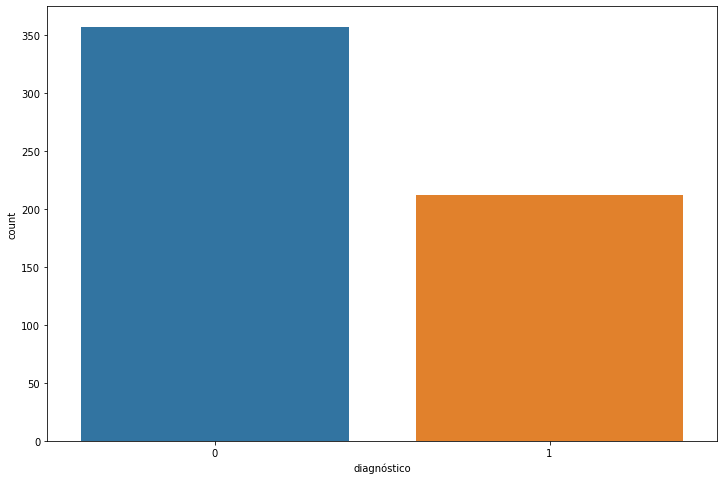

In [10]:
ax = sns.countplot(dados["diagnóstico"])
ax.figure.set_size_inches(12, 8)

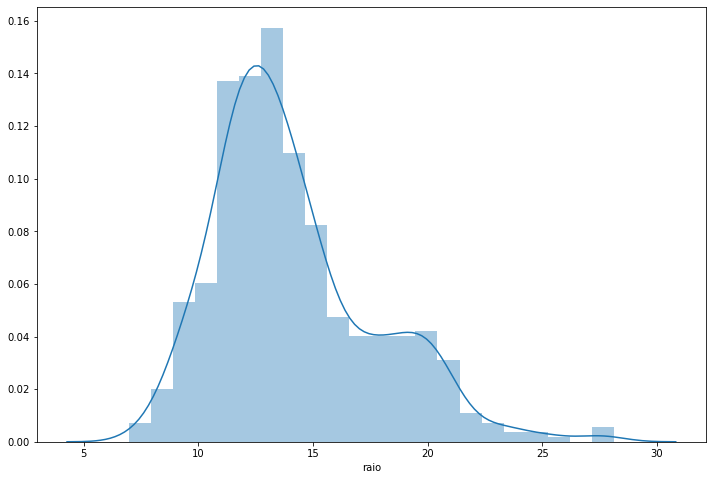

In [11]:
ax = sns.distplot(dados["raio"])
ax.figure.set_size_inches(12, 8)

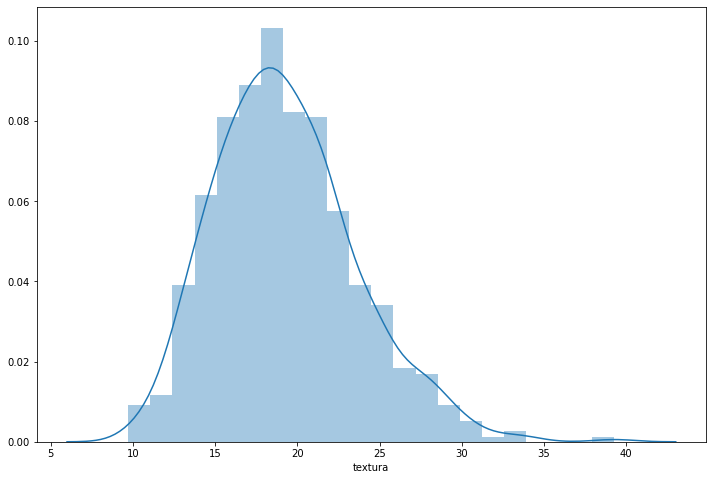

In [12]:
ax = sns.distplot(dados["textura"])
ax.figure.set_size_inches(12, 8)

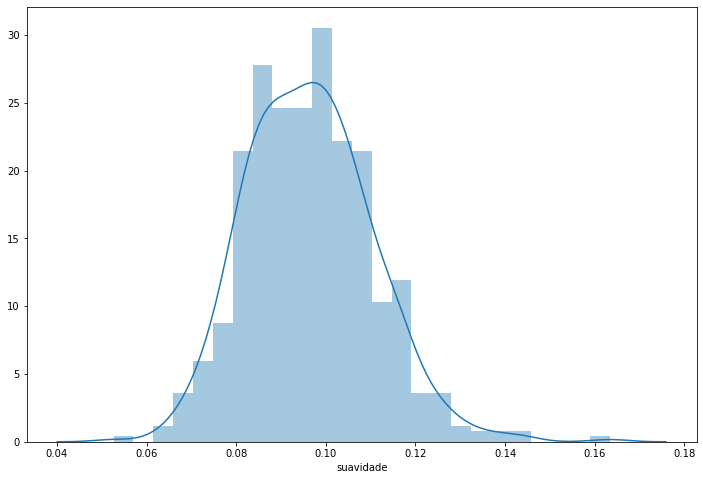

In [13]:
ax = sns.distplot(dados["suavidade"])
ax.figure.set_size_inches(12, 8)

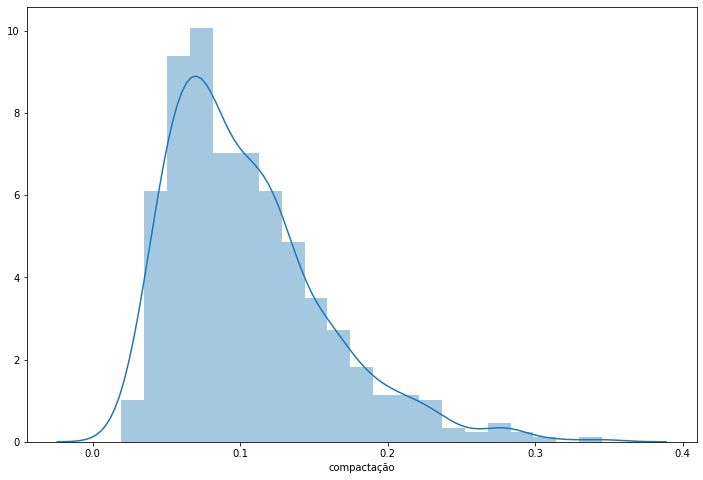

In [14]:
ax = sns.distplot(dados["compactação"])
ax.figure.set_size_inches(12, 8)

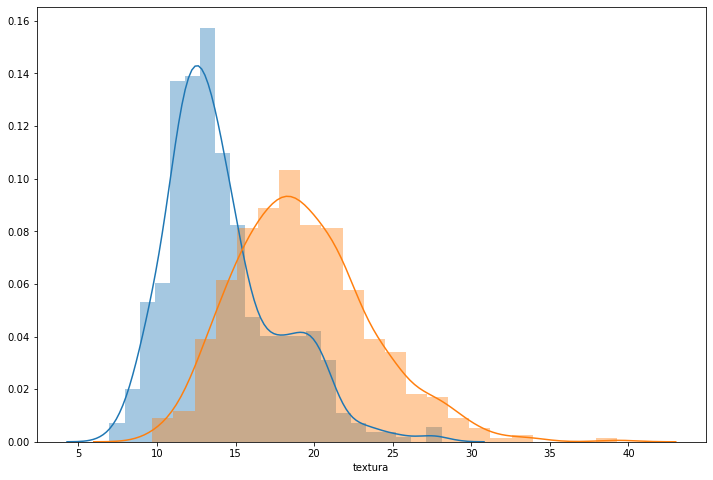

In [15]:
ax = sns.distplot(dados["raio"])
ax.figure.set_size_inches(12, 8)
ax = sns.distplot(dados["textura"])
ax.figure.set_size_inches(12, 8)

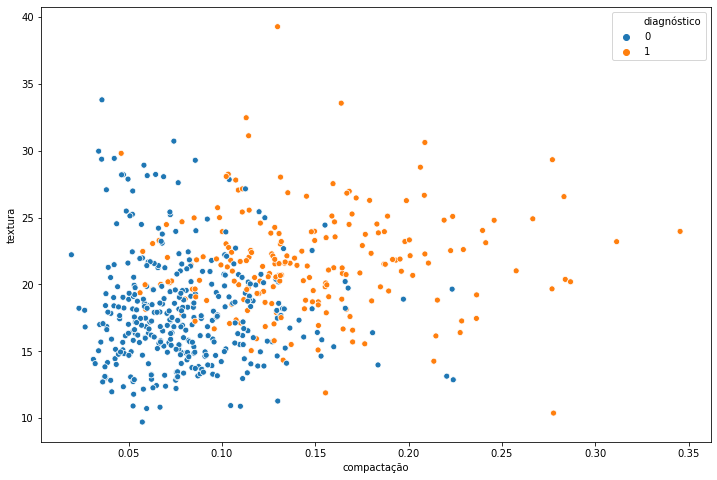

In [16]:
ax = sns.scatterplot(x = "compactação", y = "textura", data = dados, hue = "diagnóstico")
ax.figure.set_size_inches(12, 8)

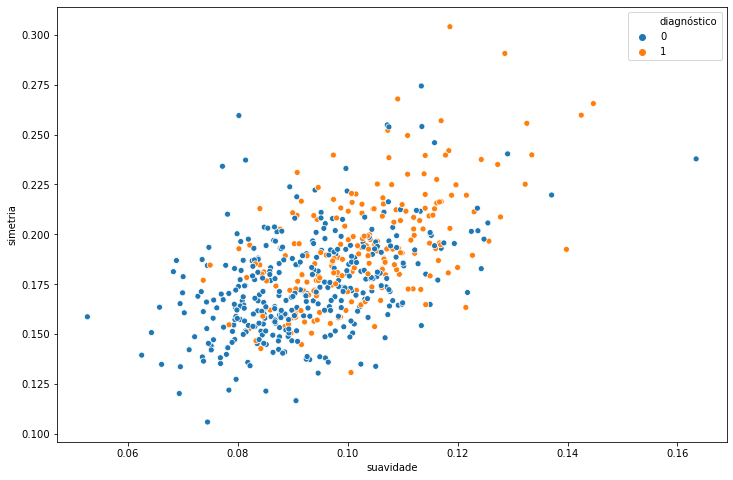

In [17]:
ax = sns.scatterplot(data = dados, x = "suavidade", y="simetria", hue = "diagnóstico")
ax.figure.set_size_inches(12, 8)

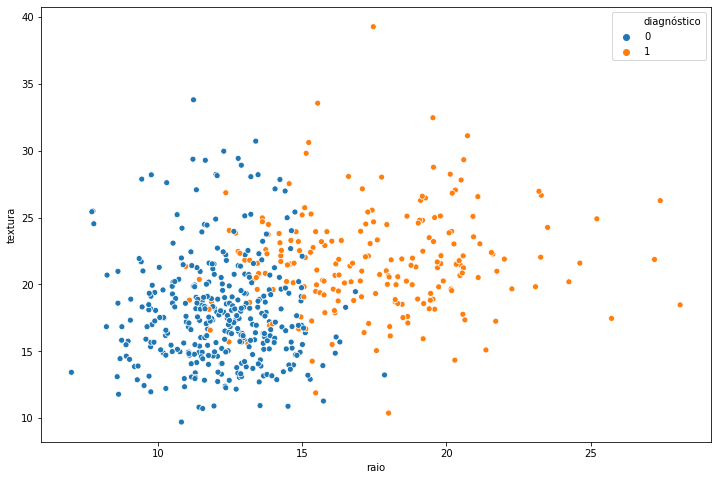

In [18]:
ax = sns.scatterplot(data = dados, x = "raio", y="textura", hue = "diagnóstico")
ax.figure.set_size_inches(12, 8)

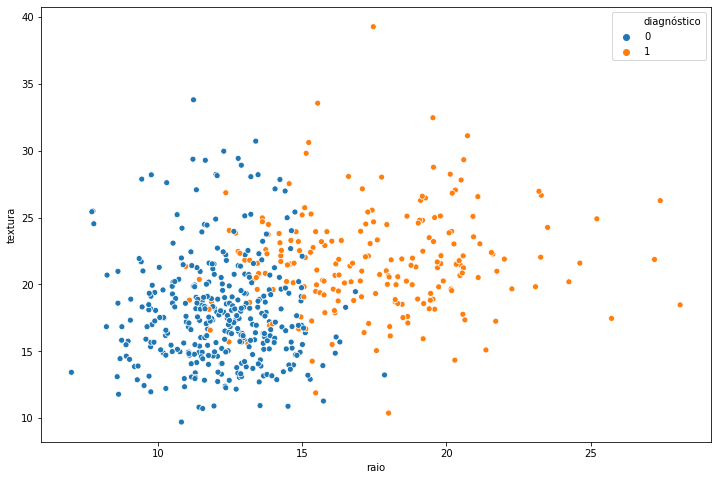

In [19]:
ax = sns.scatterplot(data = dados, x = "raio", y="textura", hue = "diagnóstico")
ax.figure.set_size_inches(12, 8)

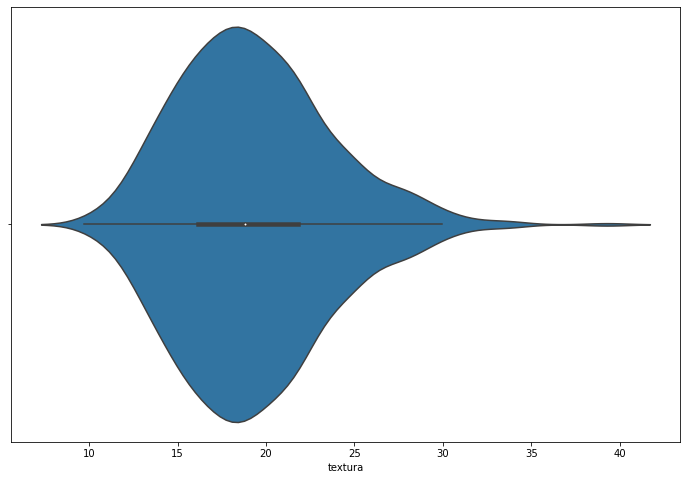

In [20]:
ax = sns.violinplot(x = "textura", data=dados)
ax.figure.set_size_inches(12, 8)

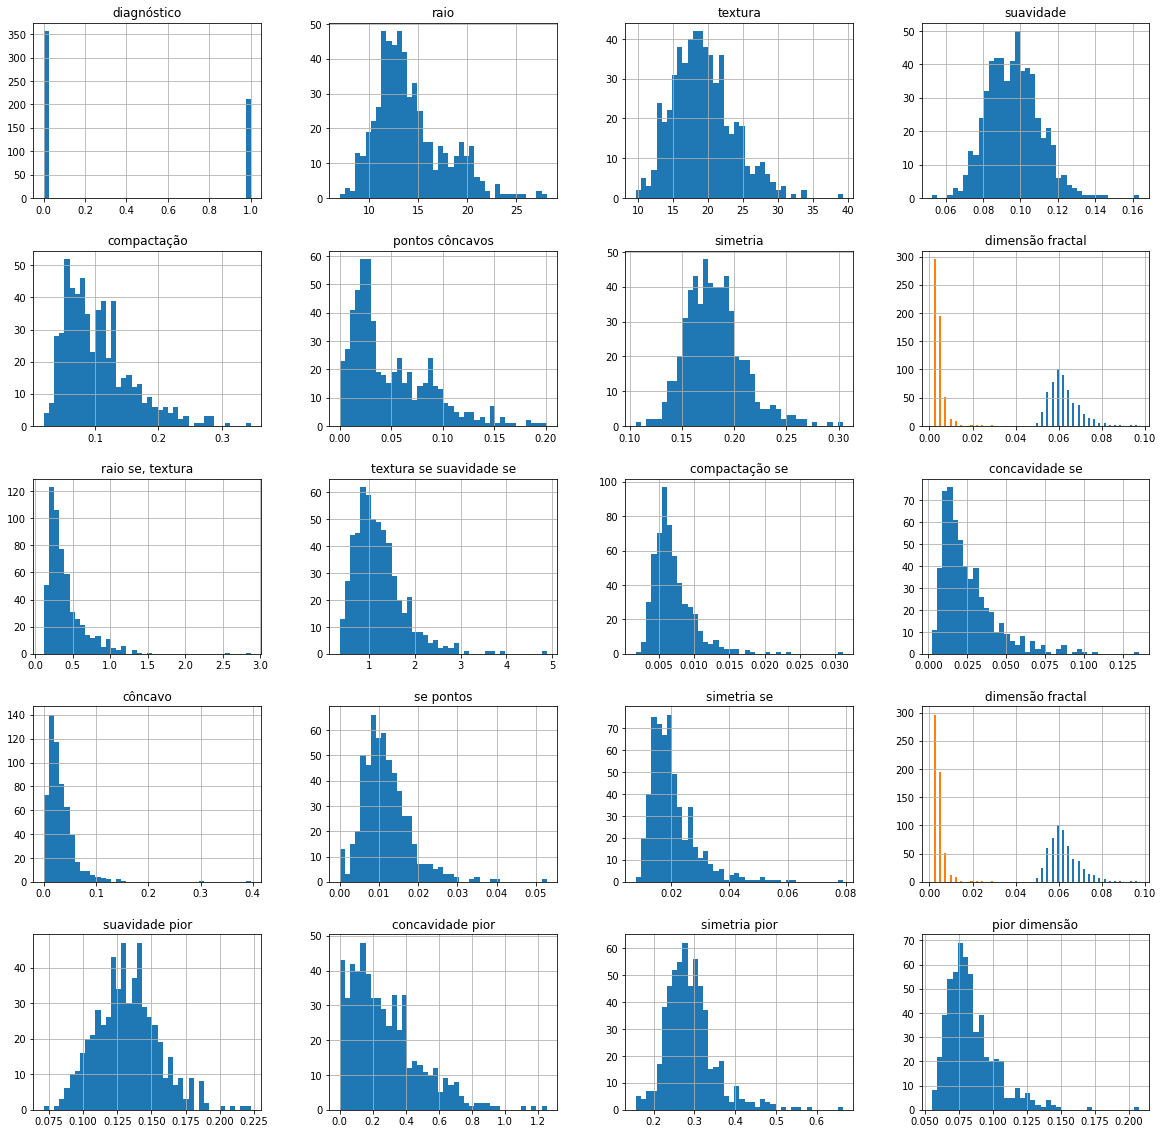

In [21]:
dados.hist(bins = 40, figsize=(20, 20))
plt.show()

<Figure size 1440x864 with 0 Axes>

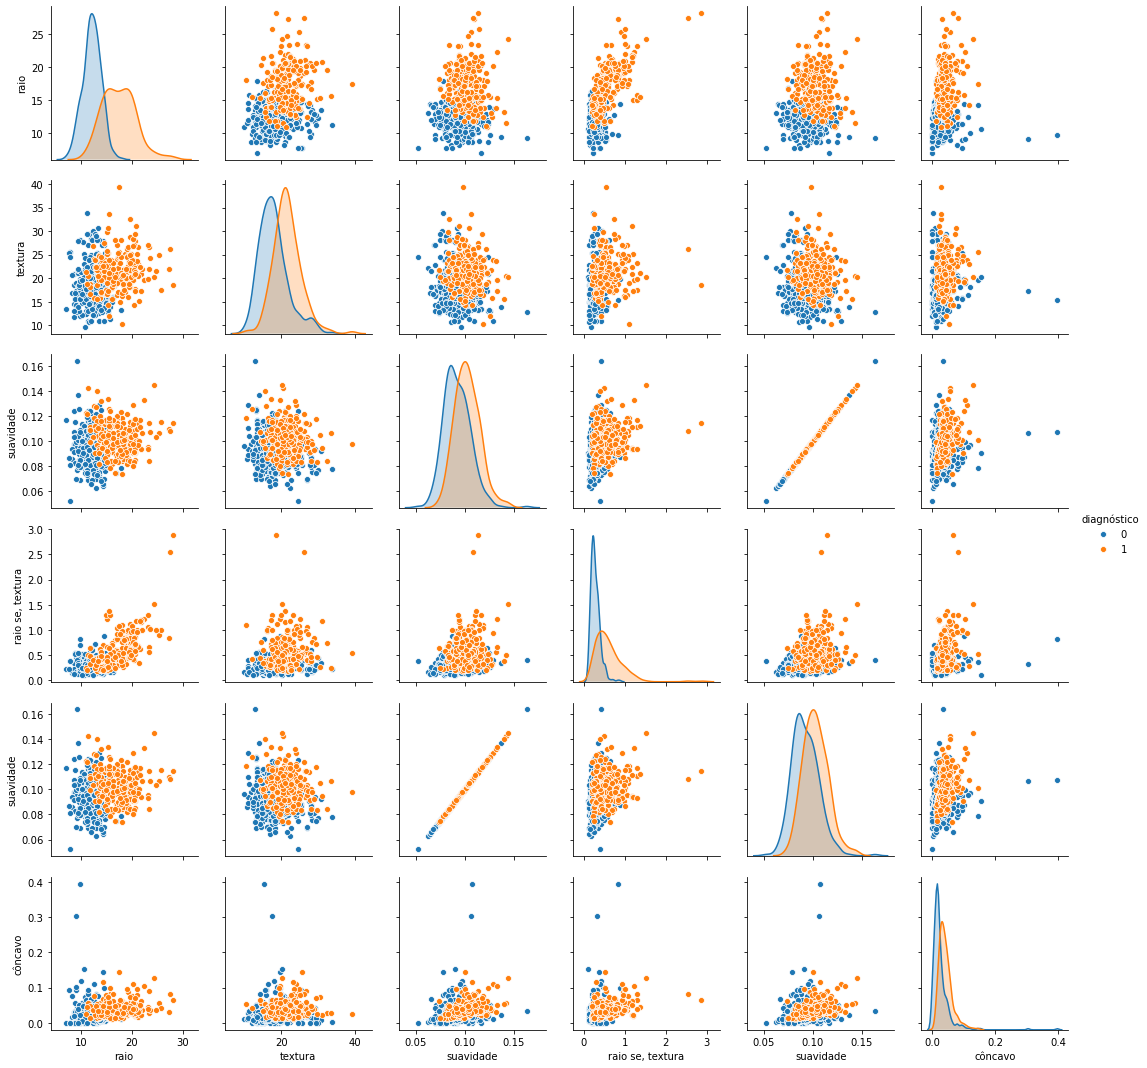

In [22]:
plt.figure(figsize=(20, 12))

ax = sns.pairplot(dados, hue = 'diagnóstico', 
             vars = ['raio', 
                     'textura', 
                     'suavidade', 
                     'raio se, textura', 
                     'suavidade', 
                     'côncavo']);

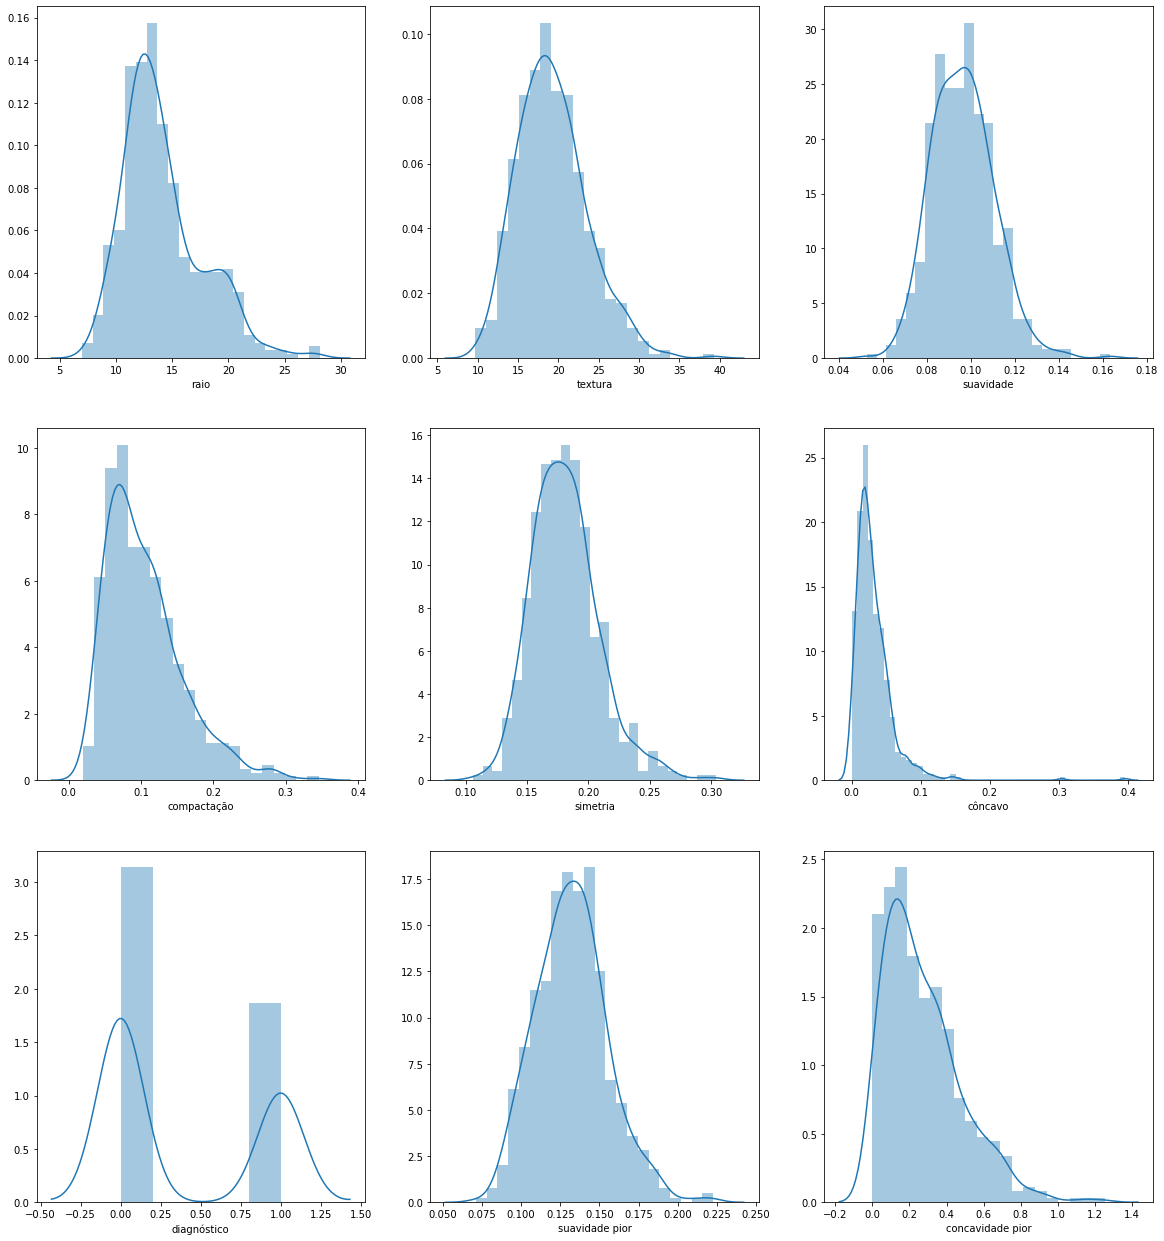

In [23]:
fig , axes = plt.subplots(nrows=3,ncols=3 , figsize = (20, 22))

ax = sns.distplot(dados["raio"] , ax=axes[0, 0])
ax = sns.distplot(dados["textura"] ,  ax=axes[0, 1])
ax = sns.distplot(dados["suavidade"] , ax=axes[0, 2])
ax = sns.distplot(dados["compactação"], ax=axes[1, 0] )
ax = sns.distplot(dados["simetria"] , ax=axes[1, 1] )
ax = sns.distplot(dados["côncavo"] , ax=axes[1, 2] )
ax = sns.distplot(dados["diagnóstico"] , ax=axes[2, 0])
ax = sns.distplot(dados["suavidade pior"], ax=axes[2, 1])
ax = sns.distplot(dados["concavidade pior"], ax=axes[2, 2])

plt.show()

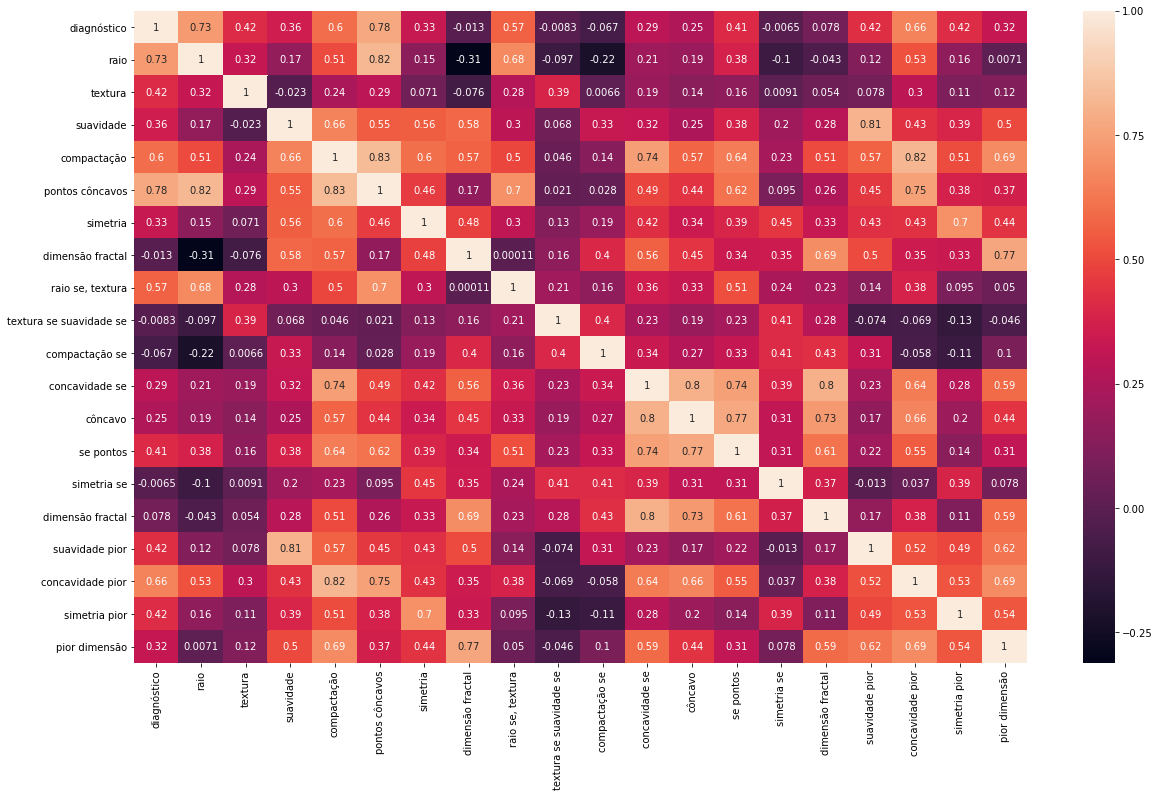

In [24]:
plt.figure(figsize=(20, 12))
sns.heatmap(dados.corr(), annot=True)
plt.show()